In [1]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/data/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
!pip install kaggle


In [3]:
!kaggle datasets list


ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned     Students Performance | Clean Dataset                10KB  2024-10-29 19:32:26           4905         89  1.0              
ironwolf437/laptop-price-dataset                             Laptop Price - dataset‏                             25KB  2024-11-12 15:50:44           1085         28  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                        22KB  2024-10-06 11:27:38          15466        214  1.0              
prajwaldongre/top-dog-breeds-around-the-world                150+ Dog Breeds Aro

In [4]:
import os
os.environ['KAGGLE_USERNAME'] = "adamnibros"  # Ganti dengan username kamu
os.environ['KAGGLE_KEY'] = "076ad015ab44bd59abddb96ea9985a97"  # Ganti dengan API key kamu


In [5]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
 99% 782M/788M [00:05<00:00, 158MB/s]
100% 788M/788M [00:05<00:00, 153MB/s]


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
!pip install gdown


In [8]:
!unzip microsoft-catsvsdogs-dataset.zip -d cats_vs_dogs

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: cats_vs_dogs/PetImages/Dog/550.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5500.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5501.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5502.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5503.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5504.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5505.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5506.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5507.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5508.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5509.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/551.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5510.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5511.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5512.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5513.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5514.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5515.jpg  
  inflating: cats_vs_dogs

In [9]:
import os

# Path ke folder PetImages
pet_images_dir = os.path.join('cats_vs_dogs', 'PetImages')

# Daftar isi folder PetImages
print(os.listdir(pet_images_dir))


['Cat', 'Dog']


In [19]:
import zipfile

# Tentukan path file ZIP dan folder tujuan ekstraksi
zip_path = 'microsoft-catsvsdogs-dataset.zip'  # Ganti dengan path file ZIP kamu
extract_folder = 'cats_vs_dogs'  # Ganti dengan folder tujuan ekstraksi

# Ekstrak file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"File berhasil diekstrak ke folder: {extract_folder}")


File berhasil diekstrak ke folder: cats_vs_dogs


In [24]:
train_dir = os.path.join('cats_vs_dogs', 'PetImages')
validation_dir = os.path.join('cats_vs_dogs', 'PetImages')

In [21]:
train_cats = os.path.join(train_dir, 'Cat')
train_dogs = os.path.join(train_dir, 'Dogs')
val_cats = os.path.join(validation_dir, 'Cat')
val_dogs = os.path.join(validation_dir, 'Dogs')
os.makedirs(train_cats, exist_ok=True)
os.makedirs(train_dogs, exist_ok=True)
os.makedirs(val_cats, exist_ok=True)
os.makedirs(val_dogs, exist_ok=True)

In [22]:
def split_data(source, train, val, split_size=0.8):
  all_files = os.listdir(source)
  train_files, val_files = train_test_split(all_files, test_size=(1-split_size),random_state=42)
  for file in train_files:
    shutil.copy(os.path.join(source, file), train)
  for file in val_files:
    shutil.copy(os.path.join(source, file), val)

In [49]:
from PIL import Image

def check_images(directory):
    valid_images = []
    invalid_images = []

    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        try:
            with Image.open(filepath) as img:
                img.verify()  # Memeriksa apakah file adalah gambar yang valid
            valid_images.append(filename)
        except Exception as e:
            invalid_images.append(filename)

    print(f"Valid images in {directory}: {len(valid_images)}")
    print(f"Invalid images in {directory}: {len(invalid_images)}")
    return valid_images, invalid_images

valid_cats, invalid_cats = check_images(train_cat_dir)
valid_dogs, invalid_dogs = check_images(train_dog_dir)


Valid images in cats_vs_dogs/PetImages/Cat: 12499
Invalid images in cats_vs_dogs/PetImages/Cat: 4


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Valid images in cats_vs_dogs/PetImages/Dog: 12499
Invalid images in cats_vs_dogs/PetImages/Dog: 4


In [34]:
import os

# Path ke file yang rusak
invalid_files = [
    os.path.join(validation_dir, '11702.jpg'),
    os.path.join(validation_dir, 'Thumbs.db')
]

# Hapus file yang rusak jika ada
for file in invalid_files:
    if os.path.exists(file):
        os.remove(file)
        print(f"{file} berhasil dihapus.")


In [35]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False  # Bekukan layer pra-terlatih

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)


In [36]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest')

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)


In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,895,105 (14.86 MB)

 Trainable params: 3,895,105 (14.86 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
from tensorflow.keras import layers, models

In [40]:
model = models.Sequential([
    # Layer Konvolusi dan Pooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Layer Fully Connected
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Aktivasi sigmoid untuk klasifikasi biner
])


In [41]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [42]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1.5e-5
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=12,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)


In [43]:
from tensorflow.keras.callbacks import EarlyStopping
# Hentikan pelatihan jika akurasi validasi melebihi 85%
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Memantau akurasi validasi
    mode='max',              # Menghentikan ketika mencapai akurasi maksimal
    patience=3,              # Jumlah epoch untuk menunggu perbaikan
    verbose=1,
    baseline=0.85            # Target akurasi minimal
)


In [44]:
print(next(train_generator))  # Menampilkan satu batch dari train_generator


(array([[[[0.04844615, 0.04452458, 0.03668145],
         [0.0509804 , 0.04705883, 0.03921569],
         [0.0509804 , 0.04705883, 0.03921569],
         ...,
         [0.06666667, 0.0509804 , 0.03921569],
         [0.06666667, 0.0509804 , 0.03921569],
         [0.04825529, 0.04361584, 0.02816886]],

        [[0.04170403, 0.03778246, 0.02993932],
         [0.04129502, 0.03737345, 0.02953031],
         [0.04524059, 0.04131902, 0.03347589],
         ...,
         [0.06666667, 0.0509804 , 0.03921569],
         [0.06021449, 0.04839952, 0.03534438],
         [0.04493219, 0.04101062, 0.02532435]],

        [[0.05490196, 0.0509804 , 0.04313726],
         [0.05123888, 0.04731731, 0.03947417],
         [0.04597811, 0.04205654, 0.0342134 ],
         ...,
         [0.06666667, 0.0509804 , 0.03921569],
         [0.05370144, 0.0457943 , 0.03143655],
         [0.04232697, 0.0384054 , 0.02271912]],

        ...,

        [[0.67687577, 0.47376448, 0.5106142 ],
         [0.6891236 , 0.4772949 , 0.51783913

In [45]:
print(validation_dir)

cats_vs_dogs/PetImages


In [46]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Menentukan 20% untuk validasi
)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    './cats_vs_dogs/PetImages',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Menggunakan subset untuk pelatihan
)

validation_generator = validation_datagen.flow_from_directory(
    './cats_vs_dogs/PetImages',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Menggunakan subset untuk validasi
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [50]:
# ipython-input-58-cef06300d944 (Modified)

from tensorflow.keras.callbacks import EarlyStopping

# Choose a single type of monitoring and remove the baseline for EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss for consistency
    patience=12,          # Number of epochs to wait for improvement
    verbose=1,
    restore_best_weights=True
)

In [51]:
# Importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define the model
# ... (your model definition code from ipython-input-1-bc9947d02596 or ipython-input-2-bc9947d02596) ...

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    './cats_vs_dogs/PetImages',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    './cats_vs_dogs/PetImages',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [63]:
from PIL import Image
import os

def validate_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Memeriksa file
            except (IOError, SyntaxError) as e:
                print(f"File rusak: {file_path}. Menghapus file.")
                os.remove(file_path)

# Validasi dataset
validate_images('cats_vs_dogs/PetImages/Cat')
validate_images('cats_vs_dogs/PetImages/Dog')


File rusak: cats_vs_dogs/PetImages/Cat/Thumbs.db. Menghapus file.
File rusak: cats_vs_dogs/PetImages/Cat/666.jpg. Menghapus file.
File rusak: cats_vs_dogs/PetImages/Dog/Thumbs.db. Menghapus file.


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


File rusak: cats_vs_dogs/PetImages/Dog/11702.jpg. Menghapus file.


In [64]:
def load_image_safe(file_path):
    try:
        img = image_utils.load_img(file_path, target_size=(150, 150))
        return img
    except Exception as e:
        print(f"Error memuat gambar: {file_path}. Melewati file ini.")
        return None


In [53]:
from tensorflow.keras import layers, models

# Membuat model sequential
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output biner (clean/messy)
])

# Menyusun model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
# Importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define the model
# ... (your model definition code from ipython-input-1-bc9947d02596 or ipython-input-2-bc9947d02596) ...

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    './cats_vs_dogs/PetImages',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    './cats_vs_dogs/PetImages',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 24998 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [66]:
import tensorflow as tf

def preprocess_image(file_path, label):
    try:
        img = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [150, 150])
        img = img / 255.0  # Normalisasi
        return img, label
    except:
        print(f"Error membaca file: {file_path}.")
        return None, None


In [55]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

In [67]:
from tensorflow.keras.callbacks import Callback

# Callback untuk menghentikan pelatihan jika akurasi validasi mencapai target
class StopAtAccuracy(Callback):
    def __init__(self, target_accuracy):
        super(StopAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get('val_accuracy')  # Ambil akurasi validasi
        if val_accuracy is not None and val_accuracy >= self.target_accuracy:
            print(f"\nAkurasi validasi telah mencapai {val_accuracy:.2f}. Menghentikan pelatihan!")
            self.model.stop_training = True

# Inisialisasi callback dengan target akurasi
stop_at_85 = StopAtAccuracy(target_accuracy=0.85)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 1475s 2s/step - accuracy: 0.7350 - loss: 0.5269 - val_accuracy: 0.7957 - val_loss: 0.4463
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1490s 2s/step - accuracy: 0.7914 - loss: 0.4404 - val_accuracy: 0.8329 - val_loss: 0.3647
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8294 - loss: 0.3834
Akurasi validasi telah mencapai 0.86. Menghentikan pelatihan!
782/782 ━━━━━━━━━━━━━━━━━━━━ 1425s 2s/step - accuracy: 0.8294 - loss: 0.3834 - val_accuracy: 0.8591 - val_loss: 0.3228


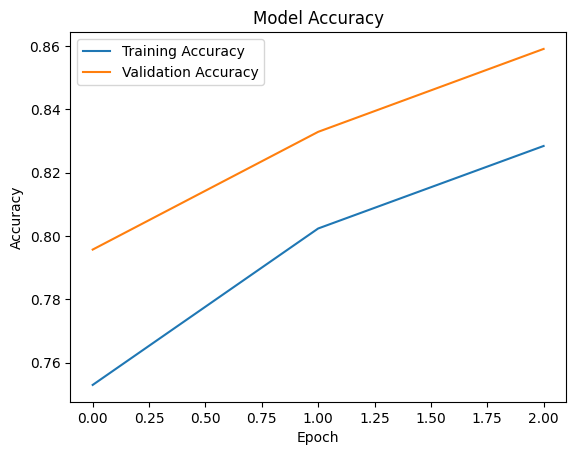

In [68]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,  # Maksimal 50 epoch
    callbacks=[stop_at_85]  # Callback untuk berhenti jika akurasi validasi >= 85%
)

# Plotting the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [69]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [70]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1.5e-5
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=12,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

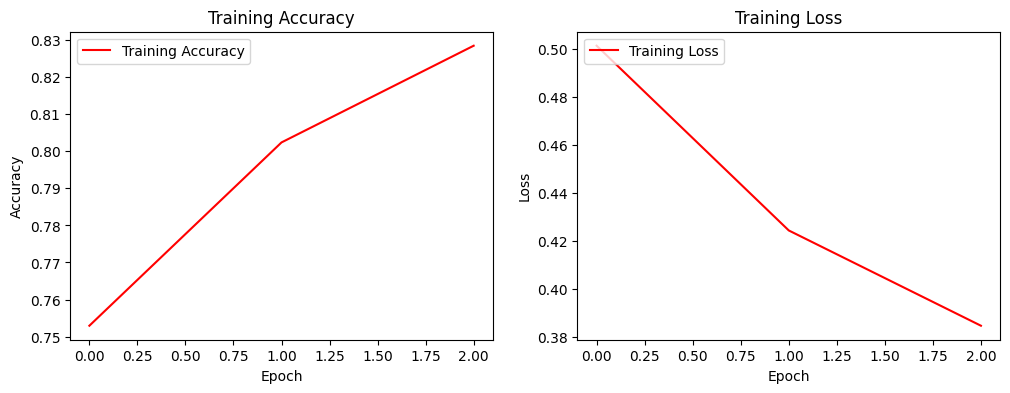

In [71]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,4)

# Define accuracy
acc = history.history['accuracy']
# Define loss
loss = history.history['loss']
epochs = range(len(acc))

# Plotting accuracy
ax[0].plot(epochs, acc, 'r', label='Training Accuracy')
ax[0].set_title('Training Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='upper left')

# Plotting loss
ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].set_title('Training Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper left')

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
    # Memuat gambar dan mengatur ukuran
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)

    # Mengonversi gambar ke array dan melakukan rescale
    x = image.img_to_array(img) / 255.0  # Skala gambar
    x = np.expand_dims(x, axis=0)

    # Melakukan prediksi
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    plt.show()

    # Cetak probabilitas prediksi
    print(f"Predicted probability: {classes[0]}")

if classes[0][0] < 0.6:  # Menggunakan threshold yang lebih tinggi
    print('The room is cat')
else:
    print('The room is dog')
